In [ ]:
from skgenome import tabio

bed_fname = '/home/sunjh/data3/project/CNVPipe/analysis/read-depth/bin.boundary.test.bed'
regions = tabio.read_auto(bed_fname)
for chrom, subregions in regions.by_chromosome():
    print(chrom, subregions)

In [ ]:
import pysam
bam_fname = '/home/sunjh/data3/project/CNVPipe/analysis/read-depth/test0.bam'
fasta = '/home/sunjh/data3/refs/hg38/analysisSet/hg38.analysisSet.fa'
bamfile = pysam.AlignmentFile(bam_fname, 'rb')

for read in bamfile.fetch('chr1', 1000000, 2000000):
    print(read.get_reference_positions())

for x in bamfile.pileup('chr1', 1397911, 1397915):
    print(str(x))

bamfile.close()

In [8]:
import pysam

print(pysam.sort.usage())

samtools sort: failed to read header from "-"



In [9]:
import pysam
tabixFile = pysam.TabixFile("/home/sunjh/data3/refs/hg38/annotation/Homo_sapiens.GRCh38.83.gtf.gz")

for gtf in tabixFile.fetch(reference='1', start=100000, end=110000, parser=pysam.asGTF()):
    print(gtf.contig, gtf.start, gtf.end, gtf.gene_id)

1 89294 133723 ENSG00000238009
1 89294 120932 ENSG00000238009
1 92229 129217 ENSG00000238009


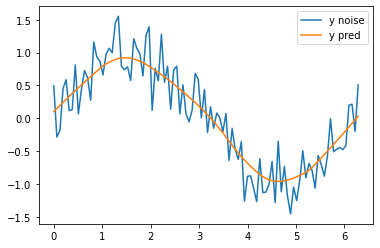

In [3]:
import numpy as np
import statsmodels.api as sm
import pylab as pl
import math

lowess = sm.nonparametric.lowess
x = np.linspace(0, 2*math.pi, 100)
y = np.sin(x) + 0.3 * np.random.randn(100)

z = lowess(y, x, frac=1./3, return_sorted=False)

pl.clf()
pl.plot(x, y, label='y noise')
pl.plot(x, z, label='y pred')
pl.legend()
pl.show()